<a href="https://colab.research.google.com/github/yasheshgupta/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
dir_path="/content/drive/MyDrive/NYC Taxi Trip Time Prediction/NYC Taxi Data.csv"

In [ ]:
df= pd.read_csv(dir_path)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# Check for null values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
#i am duplicating the data
duplicate=df.copy()

In [ ]:
df.shape

(1458644, 11)

In [ ]:
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

(array([6.00000e+01, 1.03354e+06, 2.10318e+05, 5.98960e+04, 2.84040e+04,
        7.80880e+04, 4.83330e+04, 3.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

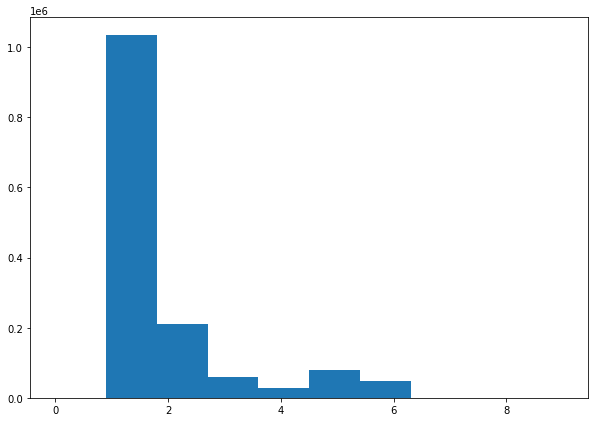

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['passenger_count'])

In [ ]:
#removing the outliers for passenger count 0,7,8,9
index=df[(df['passenger_count']==0) | (df['passenger_count']==7) | (df['passenger_count'] == 8) | (df['passenger_count'] == 9)].index
df.drop(index,inplace=True)

In [ ]:
df.shape


(1458579, 11)

In [ ]:
#data formating 
df['store_and_fwd_flag']=df['store_and_fwd_flag'].map(lambda x:0 if x=='N' else 1)


In [ ]:
df['store_and_fwd_flag'].value_counts()

0    1450537
1       8042
Name: store_and_fwd_flag, dtype: int64

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435


**Let's Check the data distribution of cordinates**

In [ ]:
dist_col=['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


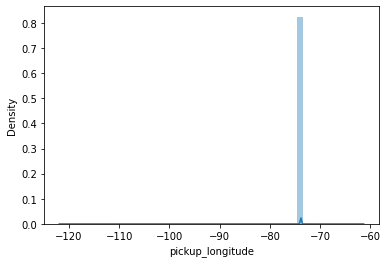

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


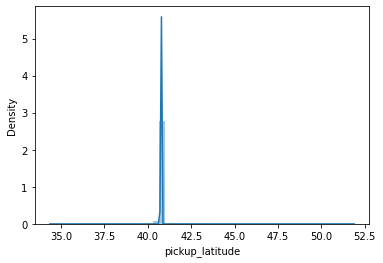

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


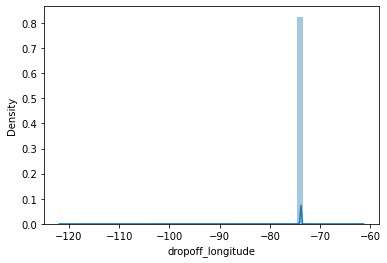

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


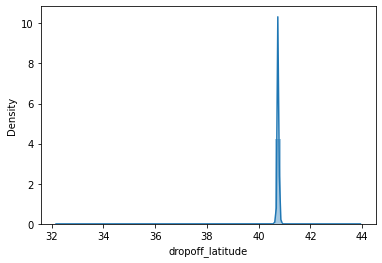

In [ ]:
for i in dist_col:
    ax = sns.distplot(df[i])
    plt.show()

In [ ]:
#Add bounds to coordinates from the dataset to avoid Outliers affecting the plots
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude > 40.6) & (df.dropoff_latitude < 40.9)]
df= df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]

In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


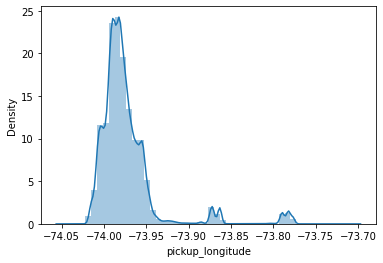

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


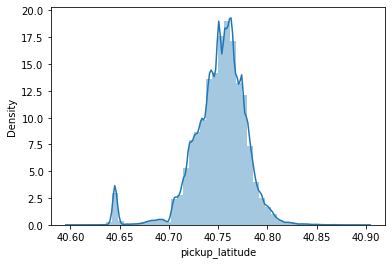

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


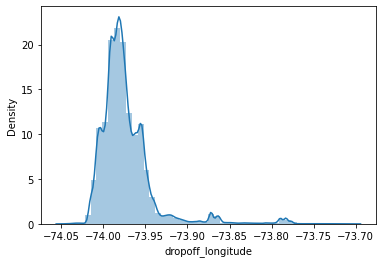

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


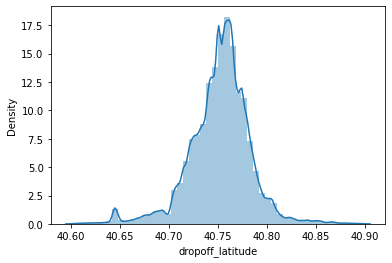

In [ ]:
for i in dist_col:
    ax = sns.distplot(df[i])
    plt.show()

In [ ]:
#i am removing more rows on the basis of this data distribution 
df= df.loc[(df.pickup_longitude > -74.02) & (df.pickup_longitude < -73.94)]
df = df.loc[(df.pickup_latitude > 40.7) & (df.pickup_latitude <40.81 )]
df = df.loc[(df.dropoff_longitude > -74.02) & (df.dropoff_longitude < -73.94)]
df = df.loc[(df.dropoff_latitude > 40.7) & (df.dropoff_latitude < 40.81)]


In [ ]:
df.shape

(1217934, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


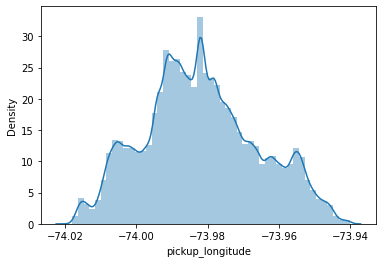

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


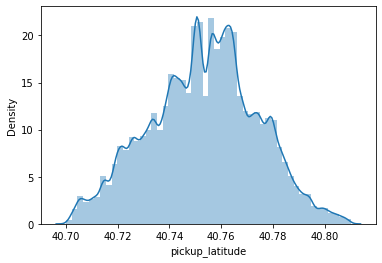

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


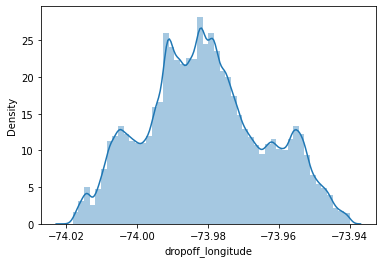

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


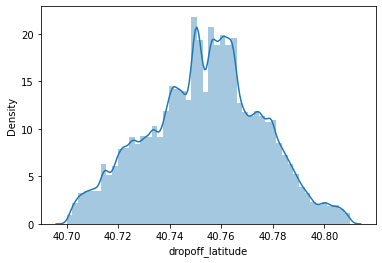

In [ ]:
for i in dist_col:
    ax = sns.distplot(df[i])
    plt.show()

** Lets work upon the trip duration **

In [ ]:
df.trip_duration.describe()


count    1.217934e+06
mean     8.060051e+02
std      3.691101e+03
min      1.000000e+00
25%      3.680000e+02
50%      5.930000e+02
75%      9.100000e+02
max      2.227612e+06
Name: trip_duration, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


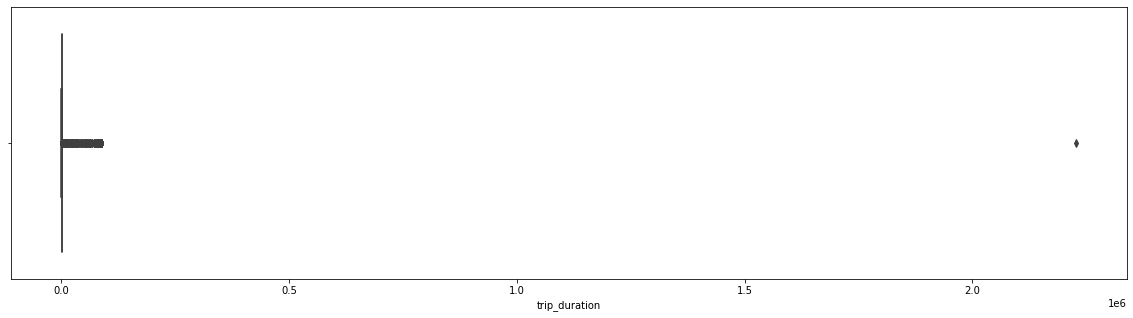

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(df.trip_duration)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


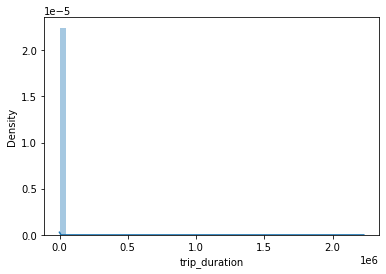

In [ ]:
ax = sns.distplot(df['trip_duration'])
plt.show()

**Here few values are more than 86400 sec which is grater than 24hrs which are outliers**

In [ ]:
index1=df[df['trip_duration'] > 86400].index
df.drop(index1,inplace=True)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


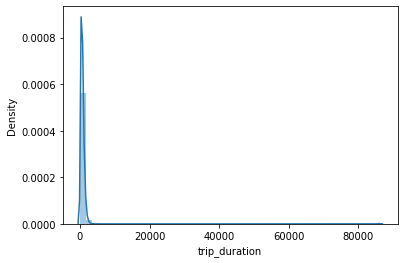

In [ ]:
ax = sns.distplot(df['trip_duration'])
plt.show()

In [ ]:
df[df['trip_duration'] > (86400/2)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,0,84594
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,0,86149
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,0,86352
3442,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,0,86236
4172,id3674870,2,2016-03-18 11:54:20,2016-03-19 11:34:17,1,-73.989090,40.736992,-73.972336,40.751511,0,85197
...,...,...,...,...,...,...,...,...,...,...,...
1454858,id2743253,2,2016-06-23 16:04:53,2016-06-24 16:01:33,1,-74.008759,40.719040,-73.972305,40.749691,0,86200
1456458,id2055880,2,2016-02-08 19:11:31,2016-02-09 19:08:44,3,-73.973282,40.760792,-73.988518,40.764210,0,86233
1457207,id1910950,2,2016-06-08 16:29:12,2016-06-09 16:11:03,1,-73.958061,40.800869,-73.964119,40.805515,0,85311
1457752,id1215198,2,2016-02-02 11:31:10,2016-02-03 11:29:44,6,-73.972069,40.794220,-73.961014,40.806728,0,86314


**Calculating the haversine distance**

In [ ]:
def haversine_dist(sub_data):
  dlat=np.radians(sub_data['dropoff_latitude']-sub_data['pickup_latitude'])
  dlon=np.radians(sub_data['dropoff_longitude'] - sub_data['pickup_longitude'])
  r=6371 #in km
  h=np.sin(dlat/2)**2+np.cos(np.radians(sub_data['dropoff_latitude']))*np.cos(np.radians(sub_data['pickup_latitude']))*(np.sin(dlon/2))**2
  d=2*r*np.arcsin(np.sqrt(h))
  return d

In [ ]:
df['haversine_dist']  = df.apply(haversine_dist, axis = 1)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,haversine_dist
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,1.188588


In [ ]:
df['haversine_dist'].describe()

count    1.217933e+06
mean     2.271714e+00
std      1.595559e+00
min      0.000000e+00
25%      1.140935e+00
50%      1.825345e+00
75%      2.943649e+00
max      1.321932e+01
Name: haversine_dist, dtype: float64

In [ ]:
max_dist=df['haversine_dist'].max()

In [ ]:
max_dist_trip_time=df[df['haversine_dist'] == max_dist].trip_duration.values[0]
max_dist_trip_time

1212

*Here we can say thet maximum distance is traveled in 1212 sec which is almost 33 minutes *

In [ ]:
#checking the trip_duration which has taken more than 5 hrs it will be treated as outlier cause the maximum distance from all the data is 13km and also less than 15 sec trips is not possible 
sub_data2=df[(df['trip_duration']>18000) | (df['trip_duration'] < 15 ) ]


In [ ]:
sub_data2

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,haversine_dist,Velocity
1960,id0508736,1,2016-03-30 08:05:38,2016-03-30 08:05:41,1,-73.964096,40.777172,-73.964088,40.777157,0,3,0.001814,0.217710
3070,id2857295,2,2016-01-28 23:34:01,2016-01-28 23:34:09,6,-73.994423,40.734810,-73.993752,40.734558,0,8,0.063117,2.840277
3480,id1622938,1,2016-04-03 13:08:49,2016-04-03 13:08:59,1,-73.987228,40.739525,-73.987228,40.739529,0,10,0.000424,0.015270
3708,id1006773,1,2016-02-04 20:57:54,2016-02-04 20:58:06,1,-73.998756,40.760258,-73.998764,40.760227,0,12,0.003454,0.103611
4597,id0719015,1,2016-06-11 16:09:09,2016-06-11 16:09:17,1,-73.988312,40.746204,-73.988419,40.746189,0,8,0.009157,0.412047
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455388,id0156896,2,2016-04-23 00:03:24,2016-04-23 00:03:30,1,-73.987518,40.749962,-73.987259,40.750324,0,6,0.045840,2.750388
1456198,id3967591,1,2016-06-02 23:17:04,2016-06-02 23:17:11,1,-73.974136,40.795700,-73.974144,40.795681,0,7,0.002216,0.113965
1456442,id3241296,2,2016-02-11 08:01:28,2016-02-11 08:01:35,1,-73.978844,40.761787,-73.978951,40.761833,0,7,0.010336,0.531573
1457746,id1044471,2,2016-01-29 21:58:11,2016-01-29 21:58:23,1,-73.975708,40.733089,-73.975685,40.733101,0,12,0.002311,0.069316


In [ ]:
df[df['trip_duration'] < 240]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,haversine_dist,Velocity
15,id3319787,1,2016-05-16 15:29:02,2016-05-16 15:32:33,1,-73.955513,40.768593,-73.948761,40.771545,0,211,0.656578,1.120228
64,id0442192,1,2016-04-10 16:07:46,2016-04-10 16:10:40,1,-74.006325,40.733391,-74.000008,40.743256,0,174,1.219220,2.522524
68,id1680350,1,2016-03-18 20:56:16,2016-03-18 20:59:51,1,-74.002983,40.723312,-74.001556,40.728825,0,215,0.624612,1.045863
72,id1510700,2,2016-02-20 21:58:13,2016-02-20 21:59:10,1,-73.958397,40.772629,-73.955132,40.774242,0,57,0.328333,2.073680
83,id1205949,1,2016-06-05 18:43:14,2016-06-05 18:46:52,1,-73.962608,40.758827,-73.954193,40.764053,0,218,0.916533,1.513541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458610,id1156695,2,2016-02-27 01:37:32,2016-02-27 01:40:39,1,-73.986832,40.733181,-73.986168,40.726452,0,187,0.750332,1.444490
1458617,id0820021,2,2016-04-15 08:31:20,2016-04-15 08:34:48,1,-73.975433,40.752411,-73.973122,40.746780,0,208,0.655668,1.134809
1458624,id3482902,1,2016-03-01 07:21:04,2016-03-01 07:23:36,1,-73.974693,40.756088,-73.969971,40.762115,0,152,0.779346,1.845819
1458635,id3027038,2,2016-05-19 14:46:55,2016-05-19 14:50:52,1,-73.985390,40.763020,-73.989708,40.767502,0,237,0.616982,0.937188


In [ ]:
df.drop(sub_data2.index,inplace=True)

In [ ]:
df.shape

(1211361, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


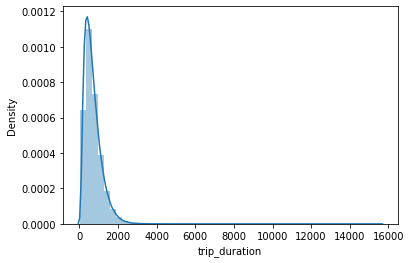

In [ ]:
ax = sns.distplot(df['trip_duration'])
plt.show()

In [ ]:
df['trip_duration'].describe()

count    1.211361e+06
mean     6.941489e+02
std      4.520871e+02
min      1.500000e+01
25%      3.690000e+02
50%      5.930000e+02
75%      9.100000e+02
max      1.561700e+04
Name: trip_duration, dtype: float64

In [ ]:
#now i am again dealing with distance outliers
df[df['haversine_dist']==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,haversine_dist,Velocity


**Above we can say distance ==0 which means which trip did not happend **

In [ ]:
sub_data3=df[df['haversine_dist']==0]

In [ ]:
#dropped above rows 
df.drop(sub_data3.index,inplace=True)


In [ ]:
df.shape

(1211361, 13)

In [ ]:
df['haversine_dist'].describe()

count    1.211361e+06
mean     2.280700e+00
std      1.592034e+00
min      4.241750e-04
25%      1.148300e+00
50%      1.831863e+00
75%      2.950230e+00
max      1.321932e+01
Name: haversine_dist, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


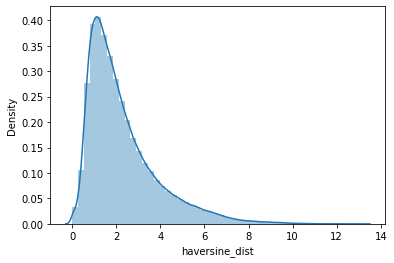

In [ ]:
ax = sns.distplot(df['haversine_dist'])
plt.show()

**Here Velocity can major help us to perdict the trip duration let's calcuate it**

In [ ]:
def velocity(df):
    return (df['haversine_dist']/(df['trip_duration']/360))

In [ ]:
df['Velocity']  = df.apply(velocity, axis = 1)

**lets know more about velocity and distances**

In [ ]:
df[df['Velocity']>90]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,haversine_dist,Velocity
1322903,id1389227,2,2016-01-17 03:11:56,2016-01-17 03:12:00,5,-73.998352,40.70853,-73.986382,40.710381,0,4,1.029739,92.67654


In [ ]:
df['Velocity'].describe()

count    1.212516e+06
mean     1.298293e+00
std      6.544266e-01
min      1.190384e-04
25%      8.651281e-01
50%      1.186608e+00
75%      1.603273e+00
max      9.267654e+01
Name: Velocity, dtype: float64

In [ ]:
df['haversine_dist'].describe()

count    1.217933e+06
mean     2.271714e+00
std      1.595559e+00
min      0.000000e+00
25%      1.140935e+00
50%      1.825345e+00
75%      2.943649e+00
max      1.321932e+01
Name: haversine_dist, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


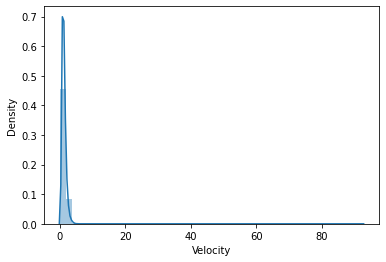

In [ ]:
#checking distribution of velocity 
ax = sns.distplot(df['Velocity'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


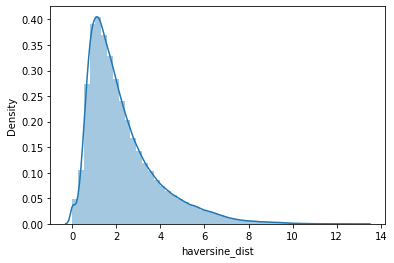

In [ ]:
#checking distribution of distance
ax = sns.distplot(df['haversine_dist'])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217933 entries, 0 to 1458643
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1217933 non-null  object 
 1   vendor_id           1217933 non-null  int64  
 2   pickup_datetime     1217933 non-null  object 
 3   dropoff_datetime    1217933 non-null  object 
 4   passenger_count     1217933 non-null  int64  
 5   pickup_longitude    1217933 non-null  float64
 6   pickup_latitude     1217933 non-null  float64
 7   dropoff_longitude   1217933 non-null  float64
 8   dropoff_latitude    1217933 non-null  float64
 9   store_and_fwd_flag  1217933 non-null  int64  
 10  trip_duration       1217933 non-null  int64  
 11  haversine_dist      1217933 non-null  float64
 12  Velocity            1217933 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 130.1+ MB


In [ ]:
#here Pickup_datetime and Dropoff_datetime should be in datatime formate

In [ ]:
df.pickup_datetime = df.pickup_datetime.apply(pd.to_datetime) # converting object into datetime format
df.info()


KeyboardInterrupt: ignored

In [ ]:
#coverting into the datatime objects 
df=df.assign(pickup_date=df.pickup_datetime.dt.date, pickup_Time=df.pickup_datetime.dt.time)

In [ ]:
#creating a copy of data 
duplicate1=df.copy()

In [ ]:
df.head()

***I am dropping the dropoff date if i will use it kind of bias situation***

In [ ]:
df=df.drop('dropoff_datetime',  axis='columns')

In [ ]:
df.head()

In [ ]:
import datetime
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_minute'] = df['pickup_datetime'].dt.minute
df['pickup_second'] = df['pickup_datetime'].dt.second


In [ ]:
df.head()


In [ ]:
# Calculate what minute in a day the pickup is at
df['pickup_minute_of_the_day'] = df.pickup_datetime.dt.hour*60 + df.pickup_datetime.dt.minute


In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
y = df.trip_duration

In [ ]:
X = df[['haversine_dist', 'Velocity','pickup_minute_of_the_day','pickup_month', 'pickup_day']]

In [ ]:
trip_model = LinearRegression()
trip_model.fit(X,y)

In [ ]:
trip_model.predict(X.head())

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
predicted_trip = trip_model.predict(X)
mean_absolute_error(y,predicted_trip) 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)   # test or validation

In [ ]:
trip_model = LinearRegression()
trip_model.fit(train_X,train_y)

In [ ]:
test_predictions = trip_model.predict(test_X)
print(mean_absolute_error(test_y, test_predictions))